In [11]:
import requests
from pprint import pprint

# Requests를 사용해 url로 요청

* token 발급
  * https://developer.riotgames.com/ -> 로그인 -> dashboard -> DEVELOPMENT API KEY 발급

In [12]:
timeout = 5

riot_token = "RGAPI-3baf32f3-3416-462a-bf19-ad535a03c19e"
headers = {
    #"Accept-Language": "ko-KR,ko;q=0.9,en-US;q=0.8,en;q=0.7,pt;q=0.6",
    #"Accept-Charset": "application/x-www-form-urlencoded; charset=UTF-8",
    #"Origin": "https://developer.riotgames.com",
    "X-Riot-Token": riot_token
}

base_url = "https://kr.api.riotgames.com"
asia_url = "https://asia.api.riotgames.com"

### LEAGUE-EXP-V4
* 특정 티어, 구간에 속하는 유저 정보 API

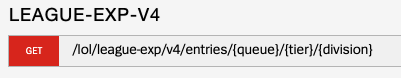

In [13]:
# Get all the league entries.

queue = "RANKED_SOLO_5x5"
tier = "CHALLENGER"
division = "I"
league_exp_v4 = f"/lol/league-exp/v4/entries/{queue}/{tier}/{division}?page=1"

response = requests.get(url=base_url+league_exp_v4, headers=headers, timeout=timeout)
pprint(response.json()[:2])

[{'freshBlood': False,
  'hotStreak': True,
  'inactive': False,
  'leagueId': 'd1ff3466-6c02-33b0-8085-9fa6a8b82dd5',
  'leaguePoints': 1588,
  'losses': 744,
  'queueType': 'RANKED_SOLO_5x5',
  'rank': 'I',
  'summonerId': '4X1qlmYKx0q1bAKXSGJqT157qwxE5pB64TYovgbnrtS7wQiDh-84UWJdIA',
  'summonerName': 'woxiangdabisai',
  'tier': 'CHALLENGER',
  'veteran': True,
  'wins': 860},
 {'freshBlood': False,
  'hotStreak': False,
  'inactive': False,
  'leagueId': 'd1ff3466-6c02-33b0-8085-9fa6a8b82dd5',
  'leaguePoints': 1549,
  'losses': 794,
  'queueType': 'RANKED_SOLO_5x5',
  'rank': 'I',
  'summonerId': 'OFBIqr2gOzBljgONMHAIOJK6cOQoEnpZXMpcVhtJ3hMtp2dPVyhcKFwfxA',
  'summonerName': 'KT PerfecT',
  'tier': 'CHALLENGER',
  'veteran': True,
  'wins': 908}]


### SUMMONER-V4
* 소환사 정보 관련 API

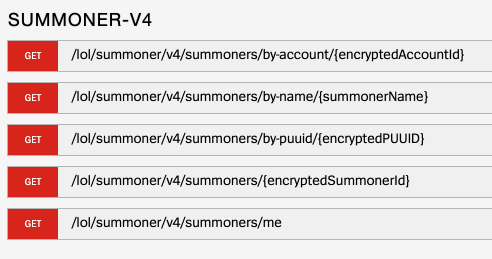

In [14]:
# Get a summoner by summoner name.

summonerName = "hide on bush"
summoner_v4 = f"/lol/summoner/v4/summoners/by-name/{summonerName}"

response = requests.get(url=base_url+summoner_v4, headers=headers, timeout=timeout)
pprint(response.json())

{'accountId': 'i8-NWVUQrY8UdYFxEUo2e63TDHdtDB41zHB0ChLhM-hP',
 'id': 'GbesqslvywKBlcXQYhCvVnwN_tTJ3iL79zKeMawG15An9g',
 'name': 'Hide on bush',
 'profileIconId': 6,
 'puuid': 'AUZp_JY-Akey--Qg-b0B4cmcv75ZcUkL_yDrmebJuLmXhdNZRFhbf9KbZDckAPOpDAgo2K9fcJ4zrA',
 'revisionDate': 1636607555000,
 'summonerLevel': 508}


### MATCH-V5
* 매치 정보 관련 API

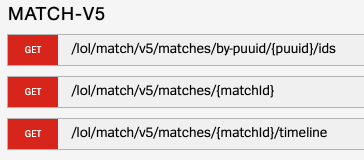

In [15]:
# Get a list of match ids by puuid
# 특정 유저의 매치 히스토리

puuid = "AUZp_JY-Akey--Qg-b0B4cmcv75ZcUkL_yDrmebJuLmXhdNZRFhbf9KbZDckAPOpDAgo2K9fcJ4zrA"
match_v5 = f"/lol/match/v5/matches/by-puuid/{puuid}/ids?start=0&count=20"

# 아시아 region 사용
response = requests.get(url=asia_url+match_v5, headers=headers, timeout=timeout)
pprint(response.json())

['KR_5560532103',
 'KR_5560196839',
 'KR_5560069150',
 'KR_5560082577',
 'KR_5559868352',
 'KR_5559823498',
 'KR_5559807554',
 'KR_5559752680',
 'KR_5558655644',
 'KR_5558567926',
 'KR_5558531010',
 'KR_5558492335',
 'KR_5558365059',
 'KR_5558340973',
 'KR_5558284659',
 'KR_5558111538',
 'KR_5557907698',
 'KR_5557911833',
 'KR_5557638120',
 'KR_5557654153']


In [16]:
# Get a match by match id

matchId = "KR_5560532103"
match_v5_by_id = f"/lol/match/v5/matches/{matchId}"

response = requests.get(url=asia_url+match_v5_by_id, headers=headers, timeout=timeout)
pprint(response.json())

{'info': {'gameCreation': 1636634322000,
          'gameDuration': 2015,
          'gameEndTimestamp': 1636636355248,
          'gameId': 5560532103,
          'gameMode': 'CLASSIC',
          'gameName': 'teambuilder-match-5560532103',
          'gameStartTimestamp': 1636634339241,
          'gameType': 'MATCHED_GAME',
          'gameVersion': '11.22.406.3587',
          'mapId': 11,
          'participants': [{'assists': 7,
                            'baronKills': 0,
                            'bountyLevel': 0,
                            'champExperience': 13697,
                            'champLevel': 15,
                            'championId': 107,
                            'championName': 'Rengar',
                            'championTransform': 0,
                            'consumablesPurchased': 3,
                            'damageDealtToBuildings': 1137,
                            'damageDealtToObjectives': 4874,
                            'damageDealtToTurrets'

# RIOT watcher 라이브러리 사용

https://riot-watcher.readthedocs.io/en/latest/

In [17]:
!pip install riotwatcher
!pip install pandas

     |████████████████████████████████| 56 kB 6.2 MB/s 


In [18]:
from riotwatcher import LolWatcher, ApiError

lol_watcher = LolWatcher(riot_token)
my_region = 'kr'

# SUMMONER API
me = lol_watcher.summoner.by_name(my_region, 'hide on bush')
pprint(me)

{'accountId': 'i8-NWVUQrY8UdYFxEUo2e63TDHdtDB41zHB0ChLhM-hP',
 'id': 'GbesqslvywKBlcXQYhCvVnwN_tTJ3iL79zKeMawG15An9g',
 'name': 'Hide on bush',
 'profileIconId': 6,
 'puuid': 'AUZp_JY-Akey--Qg-b0B4cmcv75ZcUkL_yDrmebJuLmXhdNZRFhbf9KbZDckAPOpDAgo2K9fcJ4zrA',
 'revisionDate': 1636607555000,
 'summonerLevel': 508}


In [19]:
# LEAGUE API
queue = "RANKED_SOLO_5x5"
tier = "DIAMOND"
division = "I"

# entries(region: str, queue: str, tier: str, division: str, page: int = 1)
pprint(lol_watcher.league.entries(my_region, queue, tier, division, 1)[:2])

[{'freshBlood': False,
  'hotStreak': False,
  'inactive': False,
  'leagueId': '7bcfad3d-8763-499e-9b3c-ca900cc153f3',
  'leaguePoints': 33,
  'losses': 138,
  'queueType': 'RANKED_SOLO_5x5',
  'rank': 'I',
  'summonerId': 'wKp9eTmdzwds6XfdHGa_ghcCaCjKLX4kDLc6TzTA3MgF8VuS',
  'summonerName': 'Livefastdieslow',
  'tier': 'DIAMOND',
  'veteran': False,
  'wins': 169},
 {'freshBlood': False,
  'hotStreak': False,
  'inactive': False,
  'leagueId': '2f77d4f4-a2e7-49e8-8a04-03a679538f38',
  'leaguePoints': 49,
  'losses': 559,
  'queueType': 'RANKED_SOLO_5x5',
  'rank': 'I',
  'summonerId': '8PKxceE4vIL0Ll0lufYpGGWRgjw2P4Zz6TyvSeXL7y9FY5Nc',
  'summonerName': '너희를사랑하겠다',
  'tier': 'DIAMOND',
  'veteran': False,
  'wins': 621}]


In [20]:
# MATCH API
puuid = "AUZp_JY-Akey--Qg-b0B4cmcv75ZcUkL_yDrmebJuLmXhdNZRFhbf9KbZDckAPOpDAgo2K9fcJ4zrA"

pprint(lol_watcher.match.matchlist_by_puuid(region="asia", puuid=puuid))

['KR_5560532103',
 'KR_5560196839',
 'KR_5560069150',
 'KR_5560082577',
 'KR_5559868352',
 'KR_5559823498',
 'KR_5559807554',
 'KR_5559752680',
 'KR_5558655644',
 'KR_5558567926',
 'KR_5558531010',
 'KR_5558492335',
 'KR_5558365059',
 'KR_5558340973',
 'KR_5558284659',
 'KR_5558111538',
 'KR_5557907698',
 'KR_5557911833',
 'KR_5557638120',
 'KR_5557654153']


In [21]:
match_id = "KR_5560532103"

match_history = lol_watcher.match.by_id(region="asia", match_id=match_id)
pprint(match_history)

{'info': {'gameCreation': 1636634322000,
          'gameDuration': 2015,
          'gameEndTimestamp': 1636636355248,
          'gameId': 5560532103,
          'gameMode': 'CLASSIC',
          'gameName': 'teambuilder-match-5560532103',
          'gameStartTimestamp': 1636634339241,
          'gameType': 'MATCHED_GAME',
          'gameVersion': '11.22.406.3587',
          'mapId': 11,
          'participants': [{'assists': 7,
                            'baronKills': 0,
                            'bountyLevel': 0,
                            'champExperience': 13697,
                            'champLevel': 15,
                            'championId': 107,
                            'championName': 'Rengar',
                            'championTransform': 0,
                            'consumablesPurchased': 3,
                            'damageDealtToBuildings': 1137,
                            'damageDealtToObjectives': 4874,
                            'damageDealtToTurrets'

In [22]:
pprint(match_history["info"].keys())
pprint(match_history["metadata"].keys())

dict_keys(['gameCreation', 'gameDuration', 'gameEndTimestamp', 'gameId', 'gameMode', 'gameName', 'gameStartTimestamp', 'gameType', 'gameVersion', 'mapId', 'participants', 'platformId', 'queueId', 'teams', 'tournamentCode'])
dict_keys(['dataVersion', 'matchId', 'participants'])


## Datadragon을 통한 챔피언 정보 가져오기

In [23]:
import pandas as pd
# version list

# riot_token = "RGAPI-daa0612f-98fc-4ba2-81b0-18e67ffbcc62"
lol_watcher = LolWatcher(riot_token)

version_list_url = "https://ddragon.leagueoflegends.com/api/versions.json"

# check league's latest version
# latest = lol_watcher.data_dragon.versions_for_region(my_region)['n']['champion']

response = requests.get(url=version_list_url)
response = response.json()
pprint(response[:5])



['11.23.1', '11.22.1', '11.21.1', '11.20.1', '11.19.1']


In [24]:

# Lets get some champions static information
static_champ_list = lol_watcher.data_dragon.champions(response[0], True, 'ko_KR')

# champ static list data to dict for looking up
champ_dict = {}
for key in static_champ_list['data']:
    row = static_champ_list['data'][key]
    champ_dict[row['key']] = row['id']


# print dataframe
df = pd.DataFrame(static_champ_list['data'])
df.columns = [i for i in range(len(df.keys()))]
df = df.transpose()
df.head()

,id,key,name,title,image,skins,lore,blurb,allytips,enemytips,tags,partype,info,stats,spells,passive,recommended
0,Aatrox,266,아트록스,다르킨의 검,"{'full': 'Aatrox.png', 'sprite': 'champion0.pn...","[{'id': '266000', 'num': 0, 'name': 'default',...",한때는 공허에 맞서 싸웠던 슈리마의 명예로운 수호자 아트록스와 그의 종족은 결국 공...,한때는 공허에 맞서 싸웠던 슈리마의 명예로운 수호자 아트록스와 그의 종족은 결국 공...,"[공격 성공률을 높이려면 다르킨의 검을 사용하는 동안 파멸의 돌진을 사용하세요., ...","[아트록스의 공격은 미리 표시되므로 공격이 예상되는 지역에서 벗어나세요., 아트록스...","[Fighter, Tank]",피의 샘,"{'attack': 8, 'defense': 4, 'magic': 3, 'diffi...","{'hp': 580, 'hpperlevel': 90, 'mp': 0, 'mpperl...","[{'id': 'AatroxQ', 'name': '다르킨의 검', 'descript...","{'name': '사신 태세', 'description': '주기적으로 아트록스의 ...",[]
1,Ahri,103,아리,구미호,"{'full': 'Ahri.png', 'sprite': 'champion0.png'...","[{'id': '103000', 'num': 0, 'name': 'default',...",룬테라가 가진 잠재력과 선천적으로 연결된 아리는 마법을 순수한 에너지의 구체로 변환...,룬테라가 가진 잠재력과 선천적으로 연결된 아리는 마법을 순수한 에너지의 구체로 변환...,[스킬을 연속으로 쓸 때 매혹으로 시작하면 현혹의 구슬과 여우불의 적중률이 크게 올...,"[아리는 궁극기 혼령 질주가 없으면 생존력이 극도로 낮아집니다., 미니언 뒤에 숨어...","[Mage, Assassin]",마나,"{'attack': 3, 'defense': 4, 'magic': 8, 'diffi...","{'hp': 526, 'hpperlevel': 92, 'mp': 418, 'mppe...","[{'id': 'AhriOrbofDeception', 'name': '현혹의 구슬'...","{'name': '정기 흡수', 'description': '아리가 9명의 적에게 ...",[]
2,Akali,84,아칼리,섬기는 이 없는 암살자,"{'full': 'Akali.png', 'sprite': 'champion0.png...","[{'id': '84000', 'num': 0, 'name': 'default', ...",킨코우 결사단과 그림자의 권이라는 지위를 버린 아칼리는 아이오니아인들에게 필요한 강...,킨코우 결사단과 그림자의 권이라는 지위를 버린 아칼리는 아이오니아인들에게 필요한 강...,[아칼리는 체력이 낮은 챔피언을 처치하는 데 뛰어납니다. 아군이 먼저 공격하기를 기...,[아칼리는 황혼의 장막 안에 숨어도 광역 스킬에 영향을 받을 수 있습니다. 이 경우...,[Assassin],기력,"{'attack': 5, 'defense': 3, 'magic': 8, 'diffi...","{'hp': 500, 'hpperlevel': 105, 'mp': 200, 'mpp...","[{'id': 'AkaliQ', 'name': '오연투척검', 'descriptio...","{'name': '암살자의 표식', 'description': '스킬 공격으로 챔피...",[]
3,Akshan,166,아크샨,떠도는 감시자,"{'full': 'Akshan.png', 'sprite': 'champion0.pn...","[{'id': '166000', 'num': 0, 'name': 'default',...","상반신을 드러낸 아크샨은 위험에 직면하면 눈썹을 치켜올리며 당당한 카리스마, 정의로...","상반신을 드러낸 아크샨은 위험에 직면하면 눈썹을 치켜올리며 당당한 카리스마, 정의로...","[상반신을 드러낸 아크샨은 위험에 직면하면 눈썹을 치켜올리며 당당한 카리스마, 정의...",[],"[Marksman, Assassin]",마나,"{'attack': 0, 'defense': 0, 'magic': 0, 'diffi...","{'hp': 560, 'hpperlevel': 90, 'mp': 350, 'mppe...","[{'id': 'AkshanQ', 'name': '복수의 부메랑', 'descrip...","{'name': '비열한 싸움', 'description': '아크샨의 기본 공격 ...",[]
4,Alistar,12,알리스타,미노타우로스,"{'full': 'Alistar.png', 'sprite': 'champion0.p...","[{'id': '12000', 'num': 0, 'name': 'default', ...",비할 데 없이 강력한 전사라는 평판이 자자한 알리스타는 녹서스 제국에게 부족 전체가...,비할 데 없이 강력한 전사라는 평판이 자자한 알리스타는 녹서스 제국에게 부족 전체가...,"[분쇄를 사용하면 박치기를 사용하기 좋은 위치를 잡을 수 있습니다., 알리스타에게는...",[알리스타는 방해 효과 스킬을 많이 가지고 있지만 매우 튼튼합니다. 방어력이 약한 ...,"[Tank, Support]",마나,"{'attack': 6, 'defense': 9, 'magic': 5, 'diffi...","{'hp': 600, 'hpperlevel': 106, 'mp': 350, 'mpp...","[{'id': 'Pulverize', 'name': '분쇄', 'descriptio...","{'name': '승리의 포효', 'description': '근처에서 적이 죽거나...",[]


In [25]:
df.iloc[0]["spells"]

[{'id': 'AatroxQ',
  'name': '다르킨의 검',
  'description': '아트록스가 대검을 내리쳐 물리 피해를 줍니다. 세 번까지 휘두를 수 있으며 각 공격은 피해 범위가 다릅니다.',
  'tooltip': '아트록스가 대검을 내리쳐 <physicalDamage>{{ qdamage }}의 물리 피해</physicalDamage>를 입힙니다. 끝에 적중한 적을 잠깐 <status>공중으로</status> 띄워 올리고 <physicalDamage>{{ qedgedamage }}</physicalDamage>의 피해를 입힙니다. 이 스킬은 두 번 <recast>재사용</recast>할 수 있으며 다시 사용할 때마다 범위 모양이 변하고 이전보다 25% 더 많은 피해를 입힙니다.',
  'leveltip': {'label': ['재사용 대기시간', '피해량', '총 공격력 %'],
   'effect': ['{{ cooldown }} -> {{ cooldownNL }}',
    '{{ qbasedamage }} -> {{ qbasedamageNL }}',
    '{{ qtotaladratio*100.000000 }}% -> {{ qtotaladrationl*100.000000 }}%']},
  'maxrank': 5,
  'cooldown': [14, 12, 10, 8, 6],
  'cooldownBurn': '14/12/10/8/6',
  'cost': [0, 0, 0, 0, 0],
  'costBurn': '0',
  'datavalues': {},
  'effect': [None,
   [0, 0, 0, 0, 0],
   [0, 0, 0, 0, 0],
   [0, 0, 0, 0, 0],
   [0, 0, 0, 0, 0],
   [0, 0, 0, 0, 0],
   [0, 0, 0, 0, 0],
   [0, 0, 0, 0, 0],
   [0, 0, 0, 0, 0],
   [0, 0, 0, 0, 0],
   [0, 0, 0, 0, 0]